In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [10]:
# First we must handle missing values

cols_to_fill = df.columns[:-4]
states = df['STATE'].unique()

for state in states:
    df.loc[df['STATE'] == state, cols_to_fill] = df.loc[df['STATE'] == state, cols_to_fill].interpolate()

# Drop all missing values after interpolating
df.dropna(inplace=True)

# 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [11]:
df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884


1. The total expenditure is greater than the total revenue. This means most states are going into debt.

# 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates. In your chosen state, which of the lessons are the students more successful, math or reading?

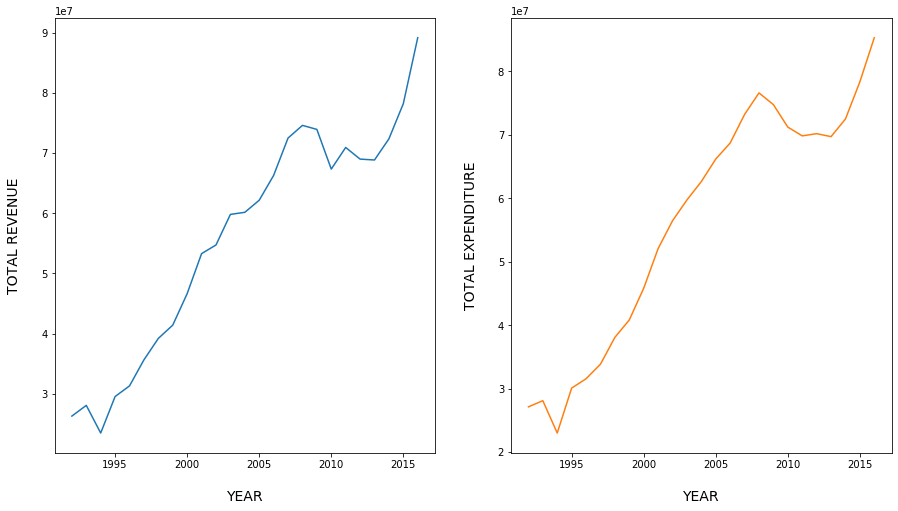

In [46]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(df[df['STATE'] == 'CALIFORNIA']['YEAR'], df[df['STATE'] == 'CALIFORNIA']['TOTAL_REVENUE'])
plt.xlabel('YEAR', fontsize=14, labelpad=20)
plt.ylabel('TOTAL REVENUE', fontsize=14, labelpad=20)

plt.subplot(1,2,2)
plt.plot(df[df['STATE'] == 'CALIFORNIA']['YEAR'], df[df['STATE'] == 'CALIFORNIA']['TOTAL_EXPENDITURE'], color='C1')
plt.xlabel('YEAR', fontsize=14, labelpad=20)
plt.ylabel('TOTAL EXPENDITURE', fontsize=14, labelpad=20)

plt.show()

The TOTAL REVENUE and TOTAL EXPENDITURE are both increasing until they reach a local maximum at the year 2009. Then they both decrease to a local minumim at the year 2103. After 2013 both plots are increasing.<br>
<br>
2009 was the peak of the housing crisis and recession. This may explain the dip between 2009 and 2013. The state may have used educational funds to help relieve the housing crisis.

# 3. In your chosen state, which one of the lessons the students are more successful, math or reading?

In [32]:
df.loc[df['STATE'] == 'CALIFORNIA', ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,10.000000,10.000000,10.000000,10.000000
mean,227.385691,209.026260,270.201543,261.902652
std,8.724144,4.095743,5.155037,4.861743
min,209.129083,201.912591,262.171027,254.895247
25%,228.099759,206.065447,267.426658,259.188273
50%,230.958151,209.142296,270.415186,261.902941
75%,232.115938,212.249135,274.685881,264.416677
max,234.164993,215.421814,276.638200,269.197451


- The AVG_MATH_4_SCORE is around 18 points higher than the AVG_READING_4_SCORE.
- The AVG_MATH_8_SCORE is around 8 points higher than the AVG_READING_4_SCORE.

# 4. What are the distributions of the math and reading scores in the sample?

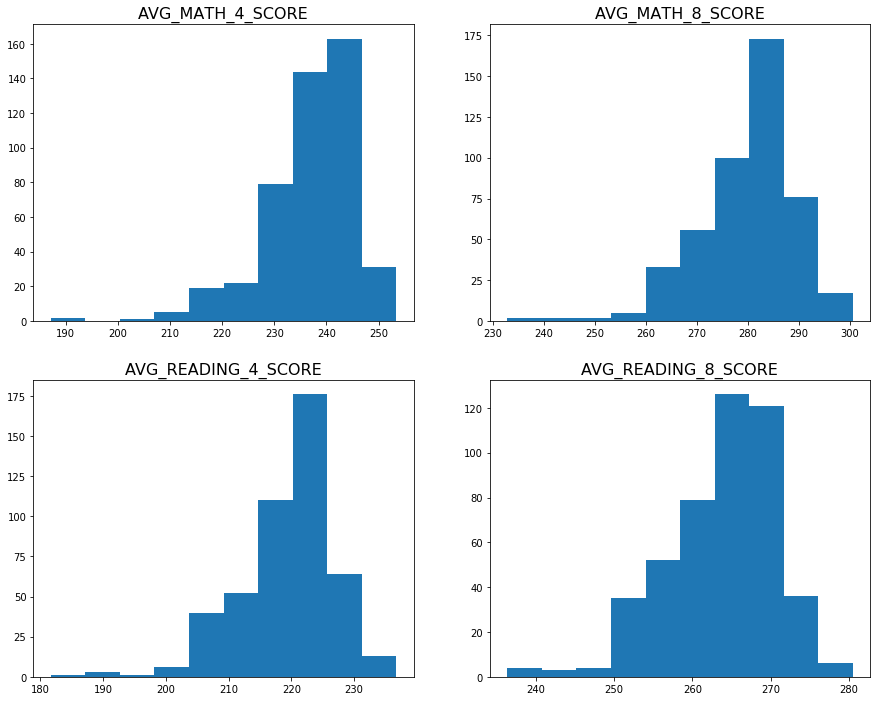

In [37]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.hist(df['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE', fontsize=16)

plt.subplot(2,2,2)
plt.hist(df['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE', fontsize=16)

plt.subplot(2,2,3)
plt.hist(df['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE', fontsize=16)

plt.subplot(2,2,4)
plt.hist(df['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE', fontsize=16)

plt.show()

All the reading and math scores are slightly skewed to the left.

# 5. Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [38]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

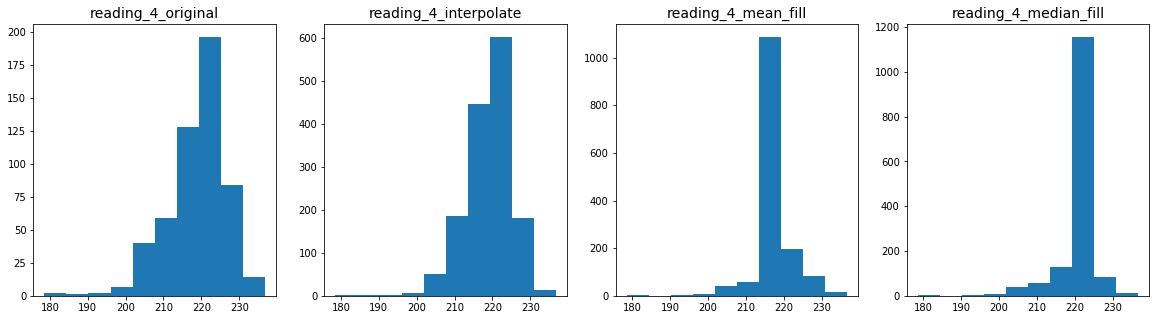

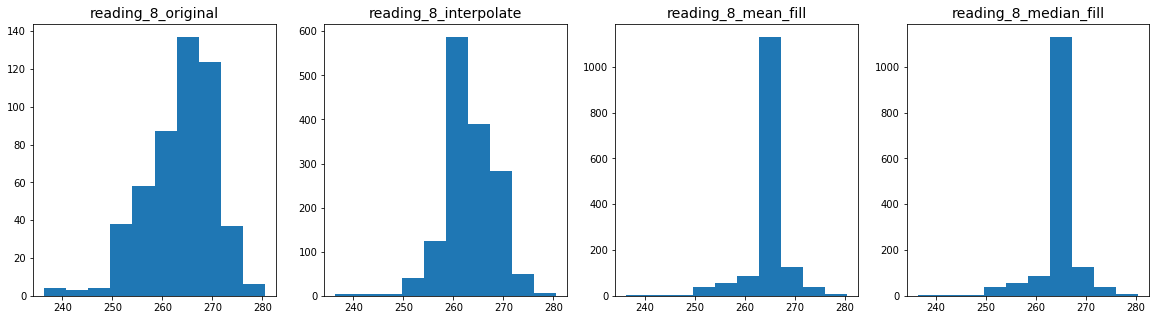

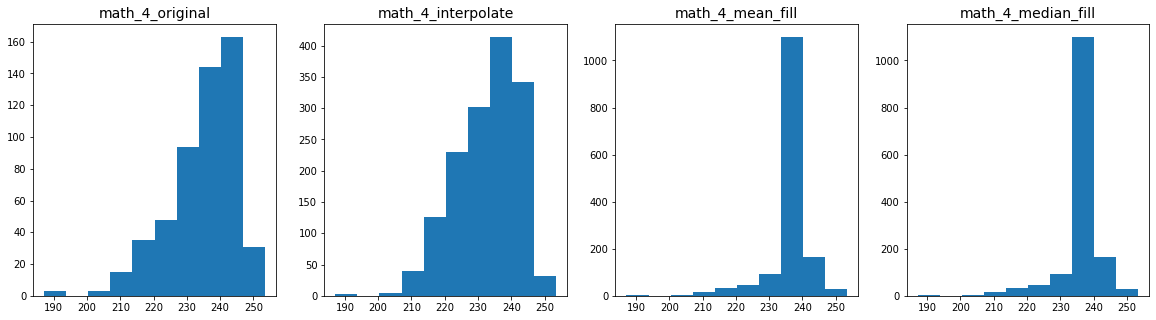

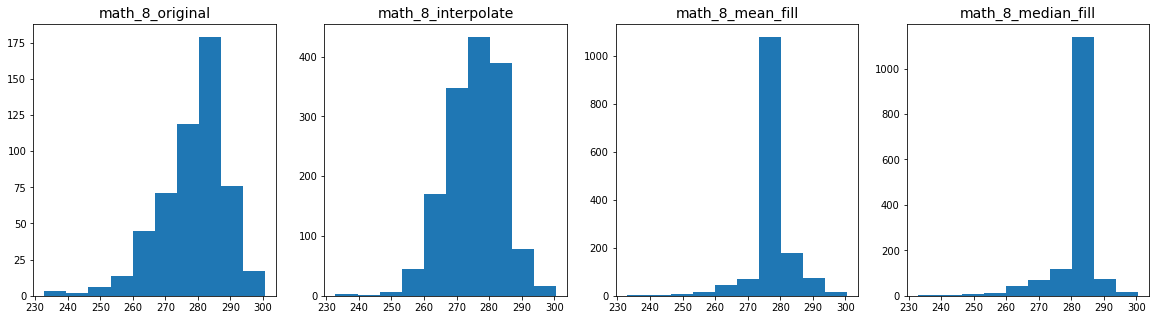

In [45]:
reading_4_original = df['AVG_READING_4_SCORE'].dropna()
reading_4_interpolate = df['AVG_READING_4_SCORE'].interpolate()
reading_4_mean_fill = df['AVG_READING_4_SCORE'].fillna(df['AVG_READING_4_SCORE'].mean())
reading_4_median_fill = df['AVG_READING_4_SCORE'].fillna(df['AVG_READING_4_SCORE'].median())

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(reading_4_original)
plt.title('reading_4_original', fontsize=14)

plt.subplot(1,4,2)
plt.hist(reading_4_interpolate)
plt.title('reading_4_interpolate', fontsize=14)

plt.subplot(1,4,3)
plt.hist(reading_4_mean_fill)
plt.title('reading_4_mean_fill', fontsize=14)

plt.subplot(1,4,4)
plt.hist(reading_4_median_fill)
plt.title('reading_4_median_fill', fontsize=14)

reading_8_original = df['AVG_READING_8_SCORE'].dropna()
reading_8_interpolate = df['AVG_READING_8_SCORE'].interpolate()
reading_8_mean_fill = df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].mean())
reading_8_median_fill = df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].median())

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(reading_8_original)
plt.title('reading_8_original', fontsize=14)

plt.subplot(1,4,2)
plt.hist(reading_8_interpolate)
plt.title('reading_8_interpolate', fontsize=14)

plt.subplot(1,4,3)
plt.hist(reading_8_mean_fill)
plt.title('reading_8_mean_fill', fontsize=14)

plt.subplot(1,4,4)
plt.hist(reading_8_median_fill)
plt.title('reading_8_median_fill', fontsize=14)

math_4_original = df['AVG_MATH_4_SCORE'].dropna()
math_4_interpolate = df['AVG_MATH_4_SCORE'].interpolate()
math_4_mean_fill = df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean())
math_4_median_fill = df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].median())

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(math_4_original)
plt.title('math_4_original', fontsize=14)

plt.subplot(1,4,2)
plt.hist(math_4_interpolate)
plt.title('math_4_interpolate', fontsize=14)

plt.subplot(1,4,3)
plt.hist(math_4_mean_fill)
plt.title('math_4_mean_fill', fontsize=14)

plt.subplot(1,4,4)
plt.hist(math_4_median_fill)
plt.title('math_4_median_fill', fontsize=14)

math_8_original = df['AVG_MATH_8_SCORE'].dropna()
math_8_interpolate = df['AVG_MATH_8_SCORE'].interpolate()
math_8_mean_fill = df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].mean())
math_8_median_fill = df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].median())

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(math_8_original)
plt.title('math_8_original', fontsize=14)

plt.subplot(1,4,2)
plt.hist(math_8_interpolate)
plt.title('math_8_interpolate', fontsize=14)

plt.subplot(1,4,3)
plt.hist(math_8_mean_fill)
plt.title('math_8_mean_fill', fontsize=14)

plt.subplot(1,4,4)
plt.hist(math_8_median_fill)
plt.title('math_8_median_fill', fontsize=14)

plt.show()

Filling the missing values with the mean and median has an extreme affect on the distribution of all the scores. This is likely due to the fact there were so many missing values to start with. I would use interpolation or delete the columns entirely.